In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
import matplotlib.pyplot as plt
import random

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
with open("cleaned_merged_fairy_tales_without_eos.txt", "r", encoding="utf-8") as f:
    text = f.read().lower()

print(f"Length of dataset: {len(text):,} characters")
print("\nSample text:\n")
print(text[:500])


Length of dataset: 20,455,694 characters

Sample text:

the happy prince.
high above the city, on a tall column, stood the statue of the happy prince.  he was gilded all over with thin leaves of fine gold, for eyes he had two bright sapphires, and a large red ruby glowed on his sword-hilt.
he was very much admired indeed.  “he is as beautiful as a weathercock,” remarked one of the town councillors who wished to gain a reputation for having artistic tastes; “only not quite so useful,” he added, fearing lest people should think him unpractical, which h


In [6]:
vocab = sorted(set(text))
vocab_size = len(vocab)

char2idx = {c: i for i, c in enumerate(vocab)}
idx2char = np.array(vocab)

# Convert all text to integer IDs
text_as_int = np.array([char2idx[c] for c in text])

print(f"Vocabulary size: {vocab_size}")
print(f"Example mapping: {list(char2idx.items())[:10]}")


Vocabulary size: 88
Example mapping: [('\n', 0), (' ', 1), ('!', 2), ('"', 3), ('$', 4), ('&', 5), ("'", 6), ('(', 7), (')', 8), ('*', 9)]


In [7]:
seq_length = 40  # number of characters per sequence
step = 3         # stride between sequences

inputs = []
targets = []

for i in range(0, len(text_as_int) - seq_length, step):
    inputs.append(text_as_int[i:i + seq_length])
    targets.append(text_as_int[i + seq_length])

x = np.array(inputs, dtype=np.int32)
y = np.array(targets, dtype=np.int32)

print(f"Number of sequences: {x.shape[0]:,}")
print(f"Input shape: {x.shape}, Target shape: {y.shape}")


Number of sequences: 6,818,552
Input shape: (6818552, 40), Target shape: (6818552,)


In [8]:
# You can uncomment this line if training takes too long.
# x = x[:100000]
# y = y[:100000]


In [9]:
embedding_dim = 64

model_rnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=seq_length),
    SimpleRNN(128),
    Dense(vocab_size, activation='softmax')
])

model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop')
model_rnn.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
history_rnn = model_rnn.fit(
    x, y,
    batch_size=128,
    epochs=10,
    verbose=1
)


Epoch 1/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 365s 7ms/step - loss: 1.7980
Epoch 2/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 374s 7ms/step - loss: 1.5532
Epoch 3/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 357s 7ms/step - loss: 1.5326
Epoch 4/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 355s 7ms/step - loss: 1.5246
Epoch 5/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 351s 7ms/step - loss: 1.5204
Epoch 6/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 350s 7ms/step - loss: 1.5177
Epoch 7/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 349s 7ms/step - loss: 1.5169
Epoch 8/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 344s 6ms/step - loss: 1.5160
Epoch 9/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 342s 6ms/step - loss: 1.5165
Epoch 10/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 341s 6ms/step - loss: 1.5171


In [11]:
model_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=seq_length),
    LSTM(128),
    Dense(vocab_size, activation='softmax')
])

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop')
model_lstm.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
history_lstm = model_lstm.fit(
    x, y,
    batch_size=128,
    epochs=10,
    verbose=1
)


Epoch 1/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 319s 6ms/step - loss: 1.8833
Epoch 2/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 314s 6ms/step - loss: 1.5057
Epoch 3/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 314s 6ms/step - loss: 1.4598
Epoch 4/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 317s 6ms/step - loss: 1.4467
Epoch 5/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 316s 6ms/step - loss: 1.4454
Epoch 6/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 314s 6ms/step - loss: 1.4486
Epoch 7/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 315s 6ms/step - loss: 1.4549
Epoch 8/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 317s 6ms/step - loss: 1.4747
Epoch 9/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 316s 6ms/step - loss: 7.0397
Epoch 10/10
53270/53270 ━━━━━━━━━━━━━━━━━━━━ 318s 6ms/step - loss: 3.7637


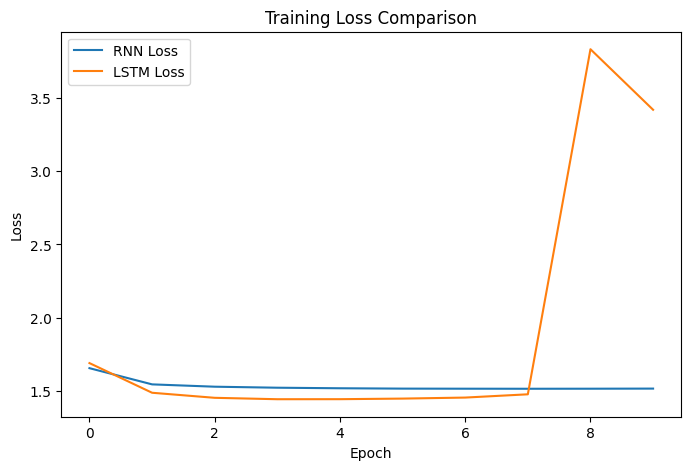

In [13]:
plt.figure(figsize=(8,5))
plt.plot(history_rnn.history['loss'], label='RNN Loss')
plt.plot(history_lstm.history['loss'], label='LSTM Loss')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
def generate_text(model, seed_text, gen_length=300, temperature=1.0):
    input_eval = [char2idx[s] for s in seed_text]
    generated = seed_text

    for _ in range(gen_length):
        input_array = np.expand_dims(input_eval[-seq_length:], 0)
        preds = model.predict(input_array, verbose=0)[0]

        # Temperature sampling for diversity
        preds = np.log(preds + 1e-8) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        next_idx = np.random.choice(range(vocab_size), p=preds)
        next_char = idx2char[next_idx]

        generated += next_char
        input_eval.append(next_idx)

    return generated


In [15]:
seed = text[:seq_length]

print("Seed text:\n", seed)
print("\n--- Generated by RNN ---\n")
print(generate_text(model_rnn, seed, temperature=0.8))
print("\n--- Generated by LSTM ---\n")
print(generate_text(model_lstm, seed, temperature=0.8))


Seed text:
 the happy prince.
high above the city, o

--- Generated by RNN ---

the happy prince.
high above the city, only called with him paper.
mr, and then he was nothing was going of at have the trease, where the back on it and the dress and take dishly work, and his jumped in the daughter retigest stood to here?" and a name, and then did the spirebe of the witive that the water, and the string and of a sight of

--- Generated by LSTM ---

the happy prince.
high above the city, of resulking at the first, he had a boy and little look of the little babies was and the stumblers to the up under the prince of in the ravingon trunk these and boy. he he was was one of a wooden he would never may-a kitches; but thrust the window she was in the captain of the white grain can his dai


In [16]:
print("""
✅ Experiment Summary:
-----------------------
• RNN and LSTM both learn to predict next characters.
• LSTM typically achieves lower loss and generates more coherent text.
• RNN struggles with long dependencies, producing repetitive or broken sequences.
• Embedding + sparse targets kept memory low and training feasible.

Next Ideas:
-----------
- Try GRU layer (tf.keras.layers.GRU)
- Experiment with longer sequences (seq_length = 60)
- Train for more epochs or add dropout to prevent overfitting
""")



✅ Experiment Summary:
-----------------------
• RNN and LSTM both learn to predict next characters.
• LSTM typically achieves lower loss and generates more coherent text.
• RNN struggles with long dependencies, producing repetitive or broken sequences.
• Embedding + sparse targets kept memory low and training feasible.

Next Ideas:
-----------
- Try GRU layer (tf.keras.layers.GRU)
- Experiment with longer sequences (seq_length = 60)
- Train for more epochs or add dropout to prevent overfitting

